In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
def Kelvin_wave_pattern(n, a):
    x = 2 * n * np.pi * np.cos(a) * (2 - np.cos(a) ** 2)
    y = -2 * n * np.pi * np.sin(a) * np.cos(a) ** 2
    return x, y

In [25]:
a = np.linspace(-np.pi/2, np.pi/2, 128, endpoint=True)
x_positive_bounds = [0]
y_positive_bounds = [0]
for n in range(1, 16):
    x, y = Kelvin_wave_pattern(n, a)
    df = pd.DataFrame({'x': x, 'y': y}, index=np.arange(128))
    x_positive_bounds.append(df.loc[: 'y'].max().tolist()[0])
    y_positive_bounds.append(df.loc[: 'y'].max().tolist()[1])

In [30]:
x_positive_bounds

[0,
 6.8398151711177215,
 13.679630342235443,
 20.519445513353165,
 27.359260684470886,
 34.19907585558861,
 41.03889102670633,
 47.87870619782405,
 54.71852136894177,
 61.55833654005949,
 68.39815171117722,
 75.23796688229493,
 82.07778205341266,
 88.9175972245304,
 95.7574123956481,
 102.59722756676582]

In [31]:
y_positive_bounds

[0,
 2.417753355278106,
 4.835506710556212,
 7.2532600658343185,
 9.671013421112423,
 12.088766776390532,
 14.506520131668637,
 16.924273486946742,
 19.342026842224847,
 21.759780197502952,
 24.177533552781064,
 26.595286908059165,
 29.013040263337274,
 31.430793618615386,
 33.848546973893484,
 36.26630032917159]

In [36]:
def linear_regression(x, y):
  N = len(x)
  sumx = sum(x)
  sumy = sum(y)
  sumx2 = sum(x ** 2)
  sumxy = sum(x * y)
  A = np.mat([[N, sumx], [sumx, sumx2]])
  b = np.array([sumy, sumxy])
  return np.linalg.solve(A, b)

In [37]:
a0, a1 = linear_regression(np.array(x_positive_bounds), np.array(y_positive_bounds))

In [41]:
_X1 = [x_positive_bounds[0], x_positive_bounds[-1]]
_Y1 = [a0 + a1 * x for x in _X1]
_Y2 = [-k for k in _Y1]

<font size=5 color=blue>#Kelvin_Wave_Pattern图像</font>

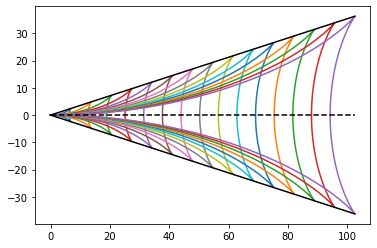

In [43]:
for n in range(1, 16):
    x, y = Kelvin_wave_pattern(n, a)
    plt.plot(x, y)
plt.plot(_X1, _Y1, color='black', linestyle='-')
plt.plot(_X1, _Y2, color='black', linestyle='-')
plt.plot([x_positive_bounds[0], x_positive_bounds[-1]], [0, 0], color='black', linestyle='--')

<font color=blue size=5>#求夹角</font>

In [46]:
f1 = np.polyfit(np.array(x_positive_bounds), np.array(y_positive_bounds), 1)

In [50]:
np.arctan(f1[0]) / np.pi * 180

19.467598130071583